<a href="https://colab.research.google.com/github/ngtinc21/Machine-Learning-Algorithms/blob/main/CNN_Example_1_Animal_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Example 1**
### Image Classification: Dogs, Cats, and Pandas

### i. Data Acquisition

Cloning into 'Dog-Cat-Panda_Images'...
remote: Enumerating objects: 3014, done.
remote: Total 3014 (delta 0), reused 0 (delta 0), pack-reused 3014
Receiving objects: 100% (3014/3014), 187.39 MiB | 42.05 MiB/s, done.
Checking out files: 100% (6007/6007), done.


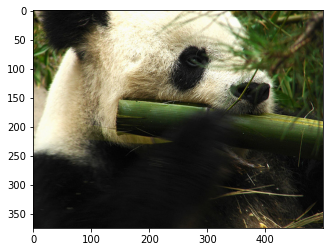

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
! git clone https://github.com/PrefaceCoding/Dog-Cat-Panda_Images

# Import the os package, from which, load in the listdir function
from os import listdir

# Create an empty list, filenames
filenames = []

# Add the name of each image in the animals/animals folder into the filenames list, 
k="Dog-Cat-Panda_Images/animals/animals"
for file1 in listdir(k): 
    file2 = k+"/"+file1
    for file3 in listdir(file2):
        filenames.append(file3)

# Randomly take out a filename
sample = np.random.choice(filenames)

# Use interpolation to link to the directory
category = sample.split("_")[0]

# Show the image
from keras.preprocessing.image import load_img
img = load_img(f"Dog-Cat-Panda_Images/animals/animals/{category}/{sample}")
plt.imshow(img)

In [ ]:
# In the keras.preprocessing.image package, load in the functions load_img and img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Create two empty lists, x and y
x=[]
y=[]

# Load each image in the animals/animals folder using a for loop
# Using the load_img and img_to_array functions, load all the images into a list x
# and add the corresponding classification into list y
k="Dog-Cat-Panda_Images/animals/animals"
for file1 in listdir(k):
    file2=k+"/"+file1
    for file3 in listdir(file2):
        file4=file2+"/"+file3
        image = load_img(file4,target_size=(108,108,3))
        img_array = img_to_array(image)
        x.append(img_array)
        y.append(file1)

# Check the length of both lists to ensure they are both the same length
len(x),len(y)

(3000, 3000)

### ii. Data Preprocessing

In [ ]:
# Normalise the values of the pixel by redefining them as a numpy array from a range 0:255 to 0:1
x = np.array(x)/255

# Now check the shape of the variable
# x should have a shape of (3000, 108, 108, 3), signifying 3000 images, of 108x108 with 3 RGB layers
print(x.shape)

(3000, 108, 108, 3)


In [ ]:
# Transform the data by redefining them as a numpy array
y = np.array(y)

# Now check the shape of the variable
# y should have a shape of (3000,), signifying 3000 labels
print(y.shape)

(3000,)


In [ ]:
# Apply the LabelEncoder function for the classification list
# Encode target labels with value between 0 and n_classes-1, in which n_classes = 3 in this case
# The transformer should be used to encode target values, i.e. y, and not the input X.
# Import the function
from sklearn.preprocessing import LabelEncoder

# Set a variable to initialise the function
k = LabelEncoder()

# Use the .fit_transform method from the function, and fit to the data y, then transform it
y= k.fit_transform(y)
y

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
# Import the to_categorical function from the keras.utils package
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Redefine y by classifying the class vector (integers) as a binary class matrix
y = to_categorical(y)
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y.shape

(3000, 3)

In [ ]:
# pip list

### iii. Model Building & Training

In [ ]:
# Split x and y into a using a 1/3 split
# Select a fix dataset from random_state = 0 for easy illustration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Import a model
from keras.models import Sequential

# Instanstiation
model = Sequential()

# Add layers
from tensorflow import keras
from keras.layers import Flatten, Dense, BatchNormalization, Dropout, Activation, Conv2D, MaxPooling2D


### The 1st Convolution and Pooling pair
model.add(Conv2D(filters = 4, kernel_size =(5,5), padding = "same", input_shape = (108,108,3), # filter = 16 or 32
# Default parameters of Conv2D:
    strides=(1, 1),                      # Strides of 2×2 in convolutional layer usually are a replacement to max pooling
    kernel_initializer="glorot_uniform", # Usually no need to change except for deeper network, use "he_uniform"
    kernel_regularizer=None))            # Typically a must for large dataset and deep network, for reducing overfitting and increase model's ability to generalize, i.e. L2 regularization -> l2(0.0005))
# # Batch normalization to regularize the convolutional layer
# model.add(BatchNormalization())
# Activation function for the convoutional layer
model.add(Activation("relu"))
# Max pooling layer, with a 2x2 pool size, no strides and valid padding by default
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))

### The 2nd Convolution and Pooling pair
model.add(Conv2D(filters = 8, kernel_size =(5,5), padding = 'same'))
# # Batch normalization to regularize the convolutional layer
# model.add(BatchNormalization())
# Activation function for the convoutional layer
model.add(Activation("relu"))
# Max pooling layer, with a 2x2 pool size, no strides and valid padding by default
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))

# Flatten layer
model.add(Flatten())

# Three Dense layers
model.add(Dense(128))
# model.add(Dropout(0.5))
model.add(Activation("relu"))

model.add(Dense(64))
# model.add(Dropout(0.5))
model.add(Activation("relu"))

# Output layer, with the number of classifications as the number of nodes and softmax as the activation
model.add(Dense(3, activation="softmax"))

# Show tht number of parameters in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 4)       304       
                                                                 
 activation (Activation)     (None, 108, 108, 4)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 8)         808       
                                                                 
 activation_1 (Activation)   (None, 54, 54, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 8)        0         
 2D)                                                    

In [ ]:
# Import the SGD function - gradient descent (with momentum) optimizer from keras.optimizers 
# Call the function with learning rate = 0.01, and momentum = 0.9
# opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
opt = keras.optimizers.Adam()

# Compile the model, with the SGD variable as the optimizer, and the appropriate loss, and metrics
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
x.shape

(3000, 108, 108, 3)

In [ ]:
# Set up the early stopping for the training to prevent overfitting
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, restore_best_weights=True)

In [ ]:
# Fitting the ANN to the dataset
history = model.fit(x_train,y_train,batch_size=32, validation_data=(x_test,y_test), epochs=25, callbacks=[early_stopping], verbose=2)  # if the accuracy is decreasing, it is a signal of overfitting!

Epoch 1/25
66/66 - 20s - loss: 0.9614 - accuracy: 0.4771 - val_loss: 0.7599 - val_accuracy: 0.6044 - 20s/epoch - 300ms/step
Epoch 2/25
66/66 - 19s - loss: 0.7498 - accuracy: 0.6419 - val_loss: 0.7196 - val_accuracy: 0.6267 - 19s/epoch - 283ms/step
Epoch 3/25
66/66 - 19s - loss: 0.6803 - accuracy: 0.6629 - val_loss: 0.7149 - val_accuracy: 0.6167 - 19s/epoch - 283ms/step
Epoch 4/25
66/66 - 19s - loss: 0.6006 - accuracy: 0.7048 - val_loss: 0.7530 - val_accuracy: 0.6233 - 19s/epoch - 284ms/step
Epoch 5/25
66/66 - 19s - loss: 0.5036 - accuracy: 0.7657 - val_loss: 0.7357 - val_accuracy: 0.6644 - 19s/epoch - 283ms/step
Epoch 6/25
66/66 - 19s - loss: 0.4273 - accuracy: 0.8076 - val_loss: 0.7443 - val_accuracy: 0.6789 - 19s/epoch - 283ms/step
Epoch 7/25
66/66 - 19s - loss: 0.3503 - accuracy: 0.8552 - val_loss: 0.8110 - val_accuracy: 0.6678 - 19s/epoch - 283ms/step
Epoch 8/25
66/66 - 19s - loss: 0.3054 - accuracy: 0.8695 - val_loss: 0.8364 - val_accuracy: 0.6556 - 19s/epoch - 283ms/step


### iv. Model Prediction

In [ ]:
# Prediction (Verify)
# Import the softmax layer
from keras.layers import Softmax

# Import the Sequential model
from keras.models import Sequential

# Generate the prediction model
prediction_model = Sequential([model,Softmax()])

# Prepare the verify test images located in the /images folder
# Add it into two new lists
x_verify=[]
y_verify=[]
k="Dog-Cat-Panda_Images/images"
for file in listdir(k):
  filename = k+"/"+file
  image = load_img(filename,target_size=(108,108,3))
  img_array = img_to_array(image)
  x_verify.append(img_array)
  y_verify.append(file.split(".")[0])

# Using the model, make a prediction onto sample images in the /images folder ( normalise the sample images first)
x_verify = np.array(x_verify)
prediction_verify = prediction_model.predict(x_verify)

In [ ]:
# Generate the predicted output and the actual label with a series of print statements
for num,predict in enumerate(prediction_verify):
  index = np.argmax(predict)
  if index == 0:
    index = "cats"
  elif index == 1:
    index = "dogs"
  else:
    index = "panda"
print(f"prediction : {index}\n")
print(f"actual label : {y_verify[num]}\n")

prediction : dogs

actual label : dog



In [ ]:
# Prediction (dataset)
# Use the prediction model to make a prediction (may take a couple minutes)
prediction = model.predict(np.array(x_test))

In [ ]:
# Take a random prediction, and compare the predicted label to the actual label in the y_test list
random = np.random.randint(0,len(np.array(x_test)))

predict = np.argmax(prediction[random])
if predict == 0:
  predict = "cats"
elif predict == 1:
  predict = "dogs"
else:
  predict = "panda"

print(f"prediction : {predict}")
print(f'matrix : {prediction[random]}')
print(f"actual label : {y_test[random]}")


prediction : dogs
matrix : [0.42004138 0.57254404 0.00741455]
actual label : [1. 0. 0.]


### v. Model Evaluation

In [ ]:
# Evaluate the accuracy of the model
loss, acc = model.evaluate(x_test,y_test, verbose=0)
acc

0.6166666746139526

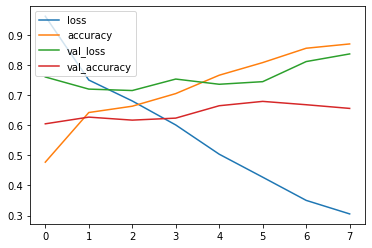

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [ ]:
prediction
class_names = ['cats','dogs','panda']
np.argmax(y_test[0])


array([0., 0., 1.], dtype=float32)

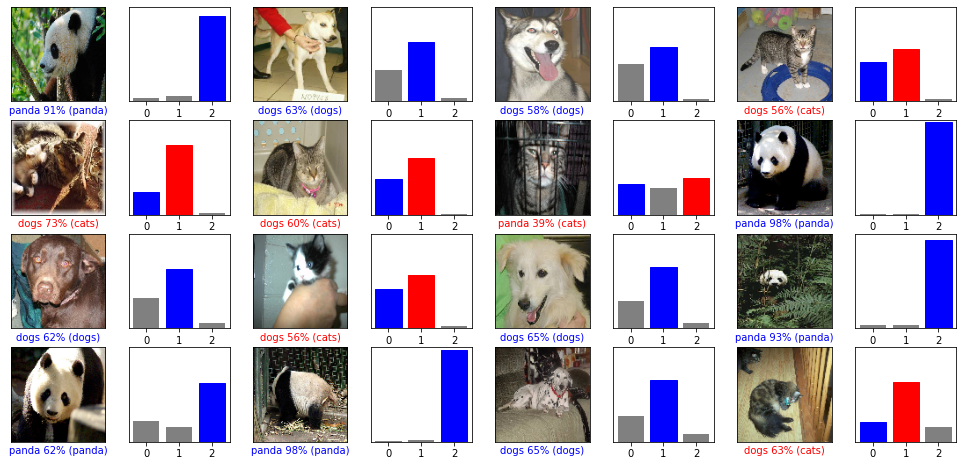

In [ ]:
# Size of the output figure
plt.figure(figsize=(17,8))

# Show the prediction results of 16 sample images
for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(prediction[i]) == np.argmax(y_test[i]):
        color = 'blue'
    else:
        color = 'red'
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(prediction[i])],
                                100*np.max(prediction[i]),
                                class_names[np.argmax(y_test[i])]),
                                color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(3), prediction[i], color="grey")
    plt.ylim([0, 1])  

    thisplot[np.argmax(prediction[i])].set_color('red')
    thisplot[np.argmax(y_test[i])].set_color('blue')
    
plt.show()

## **Trials of VGG-16 and ResNet model**

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/12


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


66/66 [==============================] - 340s 5s/step - loss: 0.7946 - accuracy: 0.6381 - val_loss: 0.6910 - val_accuracy: 0.7244
Epoch 2/12
66/66 [==============================] - 338s 5s/step - loss: 0.5157 - accuracy: 0.7886 - val_loss: 0.4998 - val_accuracy: 0.7933
Epoch 3/12
66/66 [==============================] - 338s 5s/step - loss: 0.4079 - accuracy: 0.8371 - val_loss: 0.6833 - val_accuracy: 0.7344
Epoch 4/12
66/66 [==============================] - 341s 5s/step - loss: 0.3473 - accuracy: 0.8605 - val_loss: 0.6008 - val_accuracy: 0.7589
Epoch 5/12
66/66 [==============================] - 340s 5s/step - loss: 0.4699 - accuracy: 0.8005 - val_loss: 0.5721 - val_accuracy: 0.7956
Epoch 6/12
66/66 [==============================] - 340s 5s/step - loss: 0.2828 - accuracy: 0.8810 - val_loss: 0.4974 - val_accuracy: 0.8178
Epoch 7/12
66/66 [==============================] - 337s 5s/step - loss: 0.2709 - accuracy: 0.8862 - val_loss: 0.4473 - val_accuracy: 0.8222
Epoch 8/12
66/66 [======

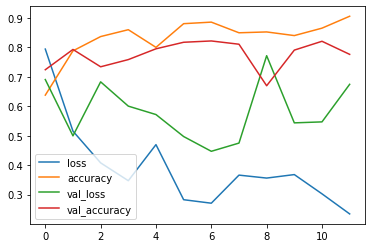

In [ ]:
def VGG16_model(x_train ,y_train, x_test, y_test):
   start_time = time.time()
   from keras.applications.vgg16 import VGG16
   from keras import Model

   model=VGG16(input_shape=(108,108,3),include_top=False)
   for layer in model.layers:
       layer.trainable = False
   flat1 = Flatten()(model.layers[-1].output)
   #  "he_uniform" is for relatively deeper network
   class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
   class2 = Dense(62, activation="relu", kernel_initializer="he_uniform")(class1)
   output = Dense(3, activation="softmax")(class1)
   model1 = Model(inputs=model.inputs, outputs=output)
   opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
   model1.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
   early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, restore_best_weights=True)
   history_VGG = model1.fit(x_train,y_train,batch_size=32, validation_data=(x_test,y_test),epochs=12,verbose=1, callbacks=[early_stopping])
   _, acc = model1.evaluate(x_test,y_test, verbose=0)
   end_time = time.time()
   return acc, pd.DataFrame(history_VGG.history), end_time - start_time
VGG16_acc, VGG16_plot, VGG16_elapse_time = VGG16_model(x_train ,y_train, x_test, y_test)
VGG16_plot.plot()
print(f"The accuracy of VGG-16 model is {VGG16_acc*100:0.1f}%, with training time {np.floor(VGG16_elapse_time/60)} minutes and {VGG16_elapse_time%60:0.0f} seconds.")


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/12
66/66 [==============================] - 126s 2s/step - loss: 1.0716 - accuracy: 0.4914 - val_loss: 0.9349 - val_accuracy: 0.5556
Epoch 2/12
66/66 [==============================] - 122s 2s/step - loss: 0.8307 - accuracy: 0.6100 - val_loss: 0.8295 - val_accuracy: 0.6011
Epoch 3/12
66/66 [==============================] - 125s 2s/step - loss: 0.7877 - accuracy: 0.6290 - val_loss: 0.8335 - val_accuracy: 0.5878
Epoch 4/12
66/66 [==============================] - 125s 2s/step - loss: 0.7426 - accuracy: 0.6576 - val_loss: 0.8386 - val_accuracy: 0.6033
Epoch 5/12
66/66 [==============================] - 126s 2s/step - loss: 0.8082 - accuracy: 0.6152 - val_loss: 0.8591 - val_accuracy: 0.6122
Epoch 6/12
66/66 [==============================] - 125s 2s/step - loss: 0.7325 - accuracy: 0.6529 - val_loss: 1.2159 - val_accuracy: 0.4444
Epoch 7/12
66/66 [==============================] - 125s 2s/step - loss: 0.7404 - accuracy: 0.6510 - val_loss: 0.8554 - val_accuracy: 0.5811
0.60111111402

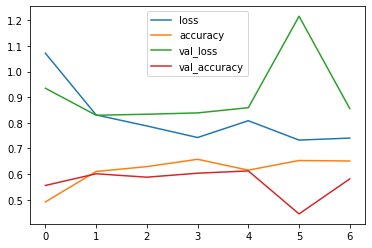

In [ ]:
def ResNet_model(x_train ,y_train, x_test, y_test):
  start_time = time.time()
  from keras import Model
  model = keras.applications.ResNet50(include_top=False, input_shape=(108, 108, 3), pooling = 'max')
  for layer in model.layers:
      layer.trainable = False

  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
  class2 = Dense(62, activation="relu", kernel_initializer="he_uniform")(class1)
  output = Dense(3, activation="softmax")(class1)
  model2 = Model(inputs=model.inputs, outputs=output)
  opt = keras.optimizers.Adam(lr=0.001)
  model2.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, restore_best_weights=True)
  history_ResNet = model2.fit(x_train,y_train,batch_size=32, validation_data=(x_test,y_test),epochs=12,verbose=1, callbacks=[early_stopping])
  loss, acc = model2.evaluate(x_test, y_test, verbose=0)
  end_time = time.time()
  return acc, pd.DataFrame(history_ResNet.history), end_time - start_time
ResNet_acc, ResNet_plot, ResNet_elapse_time = ResNet_model(x_train ,y_train, x_test, y_test)
ResNet_plot.plot()
print(f"The accuracy of ResNet-50 model is {ResNet_acc*100:0.1f}%, with training time {np.floor(ResNet_elapse_time/60)} minutes and {ResNet_elapse_time%60:0.0f} seconds.")
